# **DATA LOADING**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import zipfile
import os
from sklearn.preprocessing import LabelEncoder

In [2]:
# Provide the correct file path for your ZIP file
zip_file_path = "/content/stock price dataset.zip"

# Provide the directory where you want to extract the files
extract_to_directory = "/content/extracted_dataset/"

# Create the directory if it doesn't exist
os.makedirs(extract_to_directory, exist_ok=True)

# Unzip the dataset
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_directory)

print("Dataset has been successfully extracted to:", extract_to_directory)


Dataset has been successfully extracted to: /content/extracted_dataset/


In [3]:
df=pd.read_csv("/content/extracted_dataset/all_stocks_5yr.csv")

In [4]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


# **DATA PREPROCESSING AND EXPLORATORY DATA ANALYSIS**

DATASET INFO

In [5]:
# Display basic information about the dataset
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


TOTAL NULLS PER COLUMN

In [6]:

# Check for missing values
print("\nMissing values in the dataset:")
df.isnull().sum()


Missing values in the dataset:


date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

STATISTICAL DISTRIBUTION

In [7]:

# Display descriptive statistics
print("\nDescriptive Statistics:")
df.describe()


Descriptive Statistics:


,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [8]:
# Convert Date to datetime format if not already
df['date'] = pd.to_datetime(df['date'])

# Sort by Date
df = df.sort_values('date')

DISTRIBUTION OF OPEN, HIGH, LOW AND CLOSE PRICES

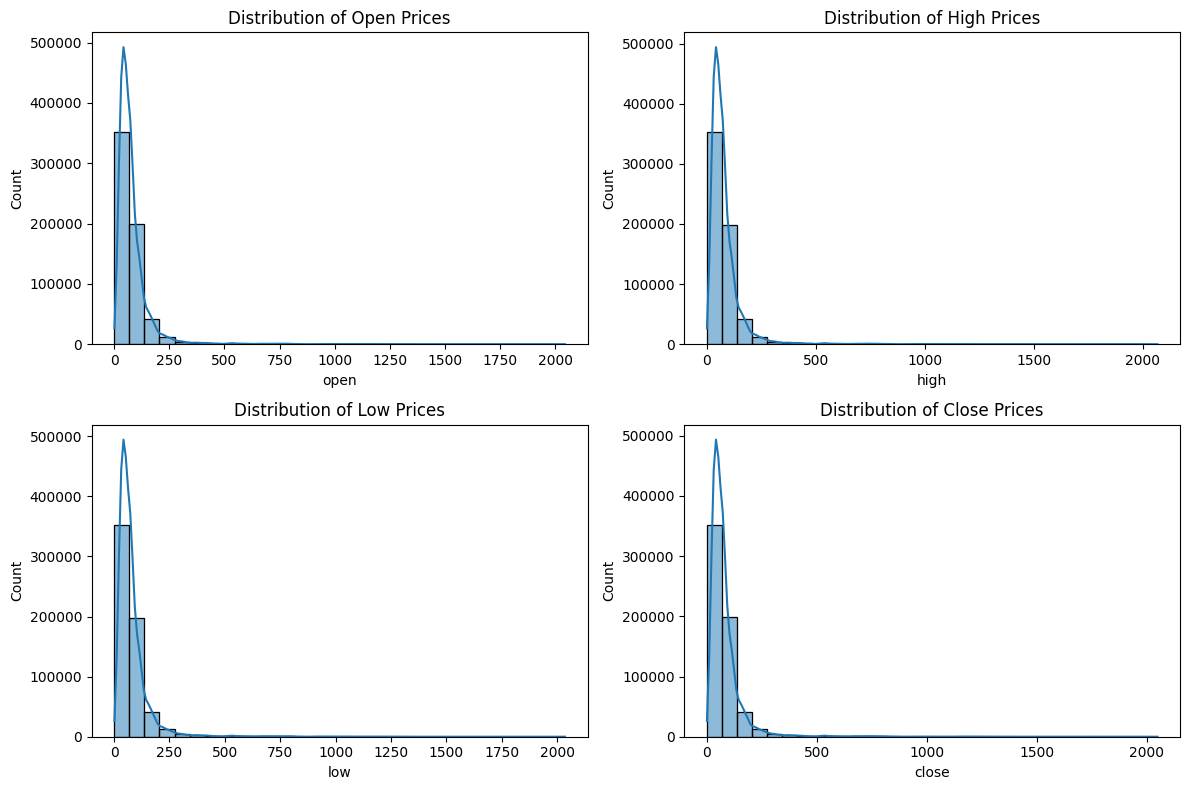

In [9]:
# Distribution of open, high, low, close prices
plt.figure(figsize=(12, 8))
for i, col in enumerate(['open', 'high', 'low', 'close']):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col.capitalize()} Prices')
plt.tight_layout()
plt.show()

BOXPLOTS FOR OPEN, HIGH, LOW AND CLOSE PRICES

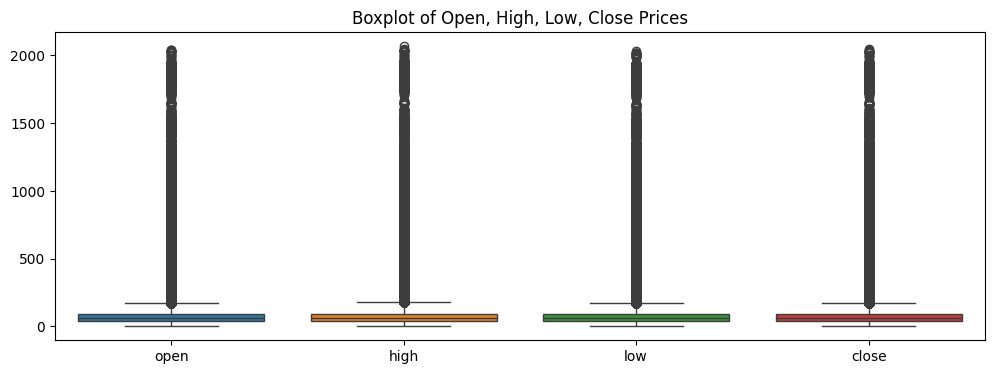

In [10]:
# Boxplot of open, high, low, close prices
plt.figure(figsize=(12, 4))
sns.boxplot(data=df[['open', 'high', 'low', 'close']])
plt.title('Boxplot of Open, High, Low, Close Prices')
plt.show()

TIME SERISE ANALYSIS

<Figure size 1400x800 with 0 Axes>

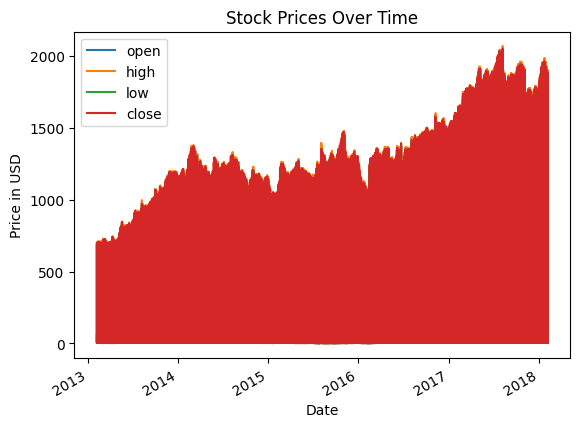

In [11]:
# Time series analysis
# Set date as index
df.set_index('date', inplace=True)

# Line plot for open, high, low, close prices
plt.figure(figsize=(14, 8))
df[['open', 'high', 'low', 'close']].plot()
plt.title('Stock Prices Over Time')
plt.ylabel('Price in USD')
plt.xlabel('Date')
plt.show()


ANALYSIS OF MOVING AVERAGES

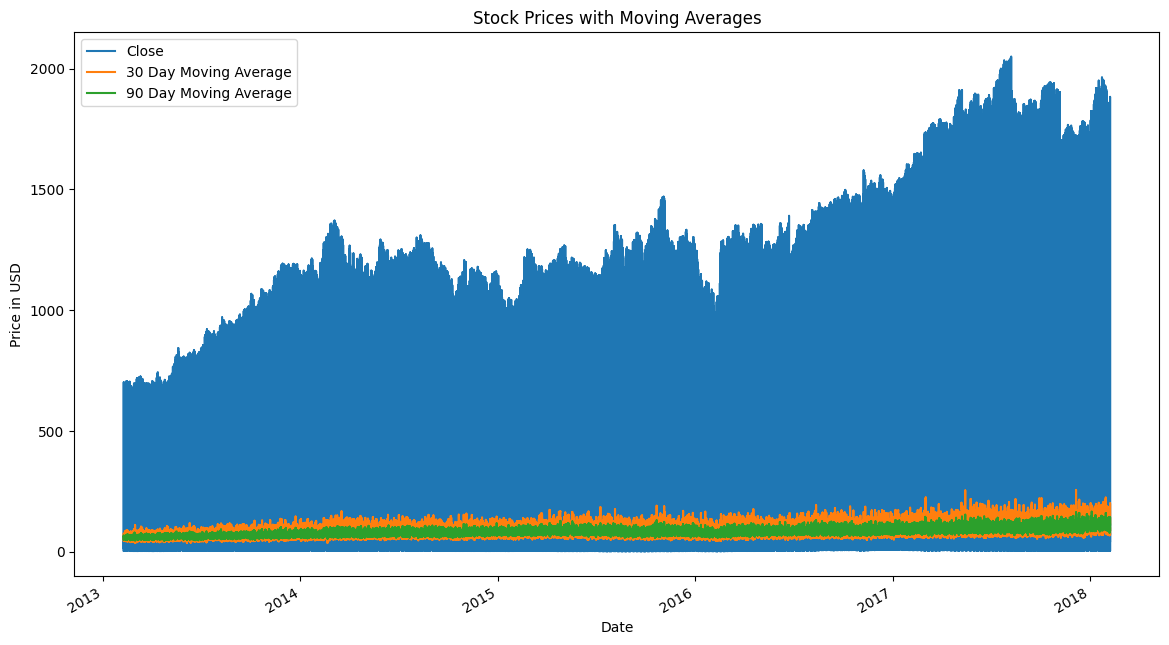

In [12]:
# Moving averages
df['MA30'] = df['close'].rolling(window=30).mean()
df['MA90'] = df['close'].rolling(window=90).mean()

plt.figure(figsize=(14, 8))
df['close'].plot(label='Close')
df['MA30'].plot(label='30 Day Moving Average')
df['MA90'].plot(label='90 Day Moving Average')
plt.title('Stock Prices with Moving Averages')
plt.ylabel('Price in USD')
plt.xlabel('Date')
plt.legend()
plt.show()


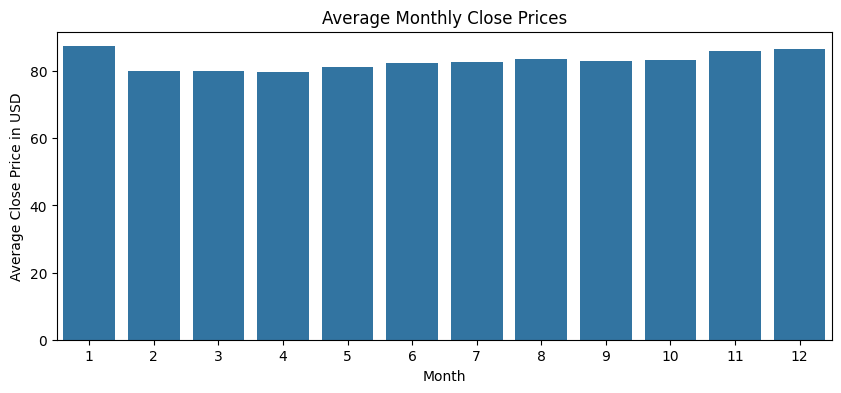

In [13]:
# Monthly average price
df['Month'] = df.index.month
monthly_avg = df.groupby('Month')['close'].mean()

plt.figure(figsize=(10, 4))
sns.barplot(x=monthly_avg.index, y=monthly_avg.values)
plt.title('Average Monthly Close Prices')
plt.xlabel('Month')
plt.ylabel('Average Close Price in USD')
plt.show()

VOLUMN ANALYSIS

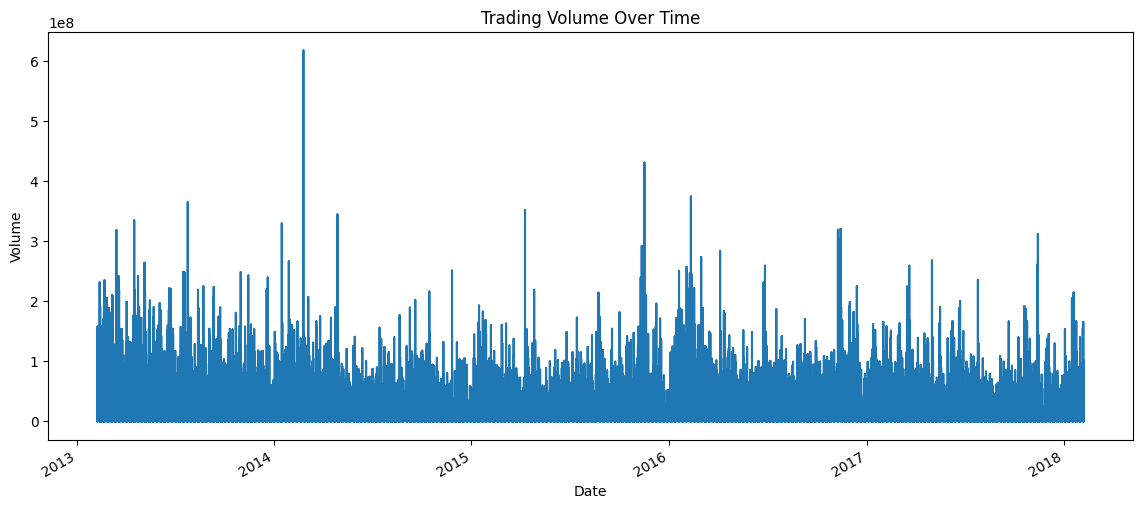

In [14]:
# Volume analysis
plt.figure(figsize=(14, 6))
df['volume'].plot()
plt.title('Trading Volume Over Time')
plt.ylabel('Volume')
plt.xlabel('Date')
plt.show()

CORRELATION MATRIX

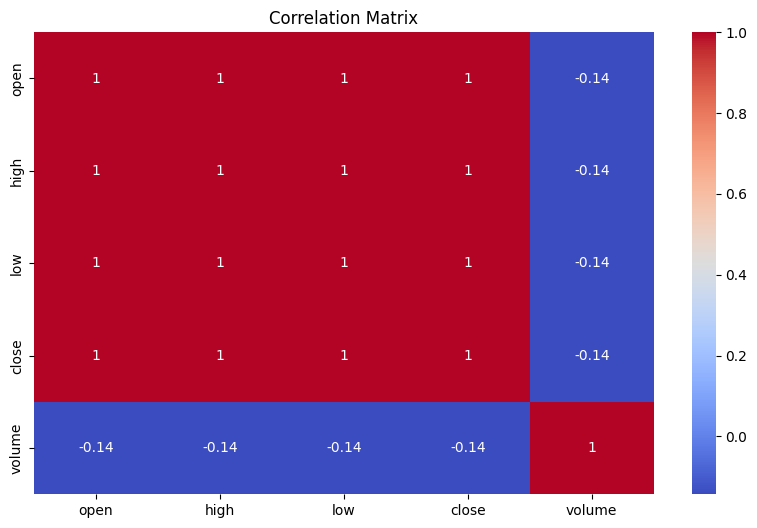

In [15]:

# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df[['open', 'high', 'low', 'close', 'volume']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# **DATA PREPROCESSING**

REMOVAL OF MISSING VALUES

In [16]:
# Remove rows with any null values
df= df.dropna()

In [17]:

# Check for missing values
print("\nMissing values in the dataset:")
df.isnull().sum()


Missing values in the dataset:


open      0
high      0
low       0
close     0
volume    0
Name      0
MA30      0
MA90      0
Month     0
dtype: int64

CONVERT NUMERICAL COLUMNS TO NUMERIC DATATYPE

In [18]:
# Convert numerical columns to numeric type
numeric_columns = ['open', 'high', 'low', 'close', 'volume']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)

In [19]:
df.dtypes

open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
MA30      float64
MA90      float64
Month       int32
dtype: object

FEATURE ENGINEERING (NEW COLUMN I.E DAILY RANGE)

In [20]:
# Feature engineering: Example - Calculate daily range
df['range'] = df['high'] - df['low']

In [21]:
df.head()

,open,high,low,close,volume,Name,MA30,MA90,Month,range
date,,,,,,,,,,
2013-02-08,59.36,59.98,59.13,59.72,2604133,CHRW,63.244000,64.932092,2,0.85
2013-02-08,34.39,34.68,33.64,34.46,464428,CBOE,60.782667,65.151092,2,1.04
2013-02-08,176.74,179.11,176.66,177.56,1456988,RL,65.214333,66.214092,2,2.45
2013-02-08,42.41,42.85,42.38,42.83,5285592,CBS,65.631667,65.811426,2,0.47
2013-02-08,45.61,45.84,45.20,45.31,543638,RJF,65.077667,63.668648,2,0.64


LABEL ENCODING OF COLUMN "Name"

In [22]:
# Label encode the 'Name' column
label_encoder = LabelEncoder()
df['Name'] = label_encoder.fit_transform(df['Name'])

In [23]:
df.head()

,open,high,low,close,volume,Name,MA30,MA90,Month,range
date,,,,,,,,,,
2013-02-08,59.36,59.98,59.13,59.72,2604133,96,63.244000,64.932092,2,0.85
2013-02-08,34.39,34.68,33.64,34.46,464428,85,60.782667,65.151092,2,1.04
2013-02-08,176.74,179.11,176.66,177.56,1456988,398,65.214333,66.214092,2,2.45
2013-02-08,42.41,42.85,42.38,42.83,5285592,86,65.631667,65.811426,2,0.47
2013-02-08,45.61,45.84,45.20,45.31,543638,397,65.077667,63.668648,2,0.64



# **PREPARATION OF DATASET FOR TRAINING**

CHOSING FEATURES AND TARGET LABEL

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming df is your dataframe
# Define the features and target variable if you have a target column
# For instance, if 'confidence' is your target variable:
X = df.drop(columns=['close'])
y = df['close']

SPLITING THE DATASET INTO TRAINING AND TESTING

In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# If you do not have a target variable and want to split the whole dataframe
# df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

# Display the shape of the train and test sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (495152, 9)
X_test shape: (123788, 9)
y_train shape: (495152,)
y_test shape: (123788,)


# **1) APPLYING LSTM WITH ATTENTION MECHANISM**

In [26]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input, Attention, Add
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Normalize the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape input to be 3D [samples, timesteps, features] for LSTM
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Define the LSTM with Attention model
inputs = Input(shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]))
lstm_out = LSTM(50, return_sequences=True)(inputs)
attention = Attention()([lstm_out, lstm_out])
context_vector = tf.reduce_sum(attention, axis=1)
output = Dense(1)(context_vector)

model = tf.keras.Model(inputs=inputs, outputs=output)
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=5, batch_size=64, validation_data=(X_test_reshaped, y_test), verbose=2, shuffle=False)

Epoch 1/5
7737/7737 - 29s - loss: 8063.4429 - val_loss: 4767.5962 - 29s/epoch - 4ms/step
Epoch 2/5
7737/7737 - 24s - loss: 3747.9612 - val_loss: 2760.1663 - 24s/epoch - 3ms/step
Epoch 3/5
7737/7737 - 27s - loss: 2307.8784 - val_loss: 1729.6298 - 27s/epoch - 3ms/step
Epoch 4/5
7737/7737 - 28s - loss: 1518.5188 - val_loss: 1146.1210 - 28s/epoch - 4ms/step
Epoch 5/5
7737/7737 - 24s - loss: 1053.1606 - val_loss: 796.7495 - 24s/epoch - 3ms/step


EVALUATION METRICES

In [28]:

# Evaluate the model
mse = model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f'Mean Squared Error on test set: {mse}')

# Make predictions
y_pred = model.predict(X_test_reshaped)

# Calculate R-squared value
r2 = r2_score(y_test, y_pred)
print(f'R-squared value on test set: {r2}')

Mean Squared Error on test set: 796.7510986328125
3869/3869 [==============================] - 7s 2ms/step
R-squared value on test set: 0.9154288339027451


EVALUATION GRAPHS

R-squared value on test set: 0.9154288339027451


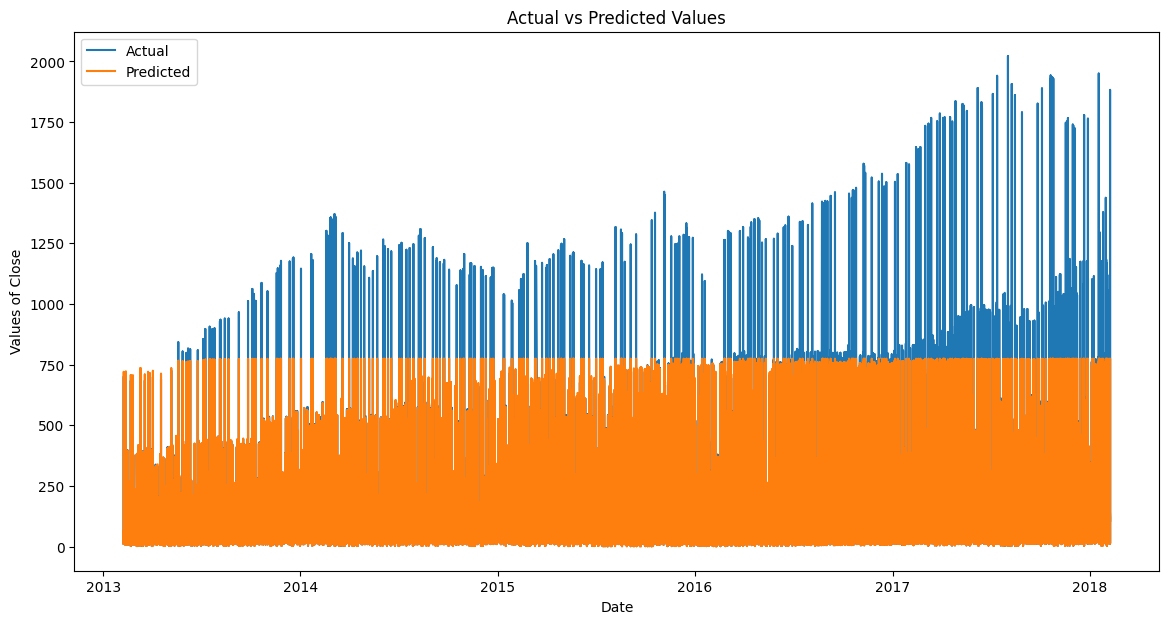

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Assuming dates is a pandas Series or array containing the dates for the test set
dates = X_test.index  # or any other way you have to get the dates for the test set

# Combine dates, y_test, and y_pred into a DataFrame for easy sorting
df = pd.DataFrame({'Date': dates, 'Actual': y_test, 'Predicted': y_pred.flatten()})

# Sort the DataFrame by date
df_sorted = df.sort_values(by='Date')

# Calculate R-squared value
r2 = r2_score(df_sorted['Actual'], df_sorted['Predicted'])
print(f'R-squared value on test set: {r2}')

# Plot actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(df_sorted['Date'], df_sorted['Actual'], label='Actual')
plt.plot(df_sorted['Date'], df_sorted['Predicted'], label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Values of Close')
plt.legend()
plt.show()


**2) APPLYING LSTM-CNN MODEL**

In [30]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Conv1D, MaxPooling1D, Dense, Input
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Normalize the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape input to be 3D [samples, timesteps, features] for LSTM
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Define the LSTM + CNN model
inputs = Input(shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]))

# CNN layers
cnn_out = Conv1D(filters=64, kernel_size=1, activation='relu')(inputs)
cnn_out = MaxPooling1D(pool_size=1)(cnn_out)

# LSTM layer
lstm_out = LSTM(50, activation='relu', return_sequences=False)(cnn_out)

# Output layer
output = Dense(1)(lstm_out)

model = tf.keras.Model(inputs=inputs, outputs=output)
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=5, batch_size=64, validation_data=(X_test_reshaped, y_test), verbose=2, shuffle=False)

Epoch 1/5
7737/7737 - 31s - loss: 770.3693 - val_loss: 1.8590 - 31s/epoch - 4ms/step
Epoch 2/5
7737/7737 - 30s - loss: 3.1704 - val_loss: 1.8791 - 30s/epoch - 4ms/step
Epoch 3/5
7737/7737 - 27s - loss: 2.7658 - val_loss: 2.0579 - 27s/epoch - 3ms/step
Epoch 4/5
7737/7737 - 26s - loss: 2.4416 - val_loss: 2.3471 - 26s/epoch - 3ms/step
Epoch 5/5
7737/7737 - 30s - loss: 2.2017 - val_loss: 1.9528 - 30s/epoch - 4ms/step


EVALUATION METRICES

In [31]:

# Evaluate the model
mse = model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f'Mean Squared Error on test set: {mse}')

# Make predictions
y_pred = model.predict(X_test_reshaped)

# Calculate R-squared value
r2 = r2_score(y_test, y_pred)
print(f'R-squared value on test set: {r2}')

Mean Squared Error on test set: 1.9528039693832397
3869/3869 [==============================] - 7s 2ms/step
R-squared value on test set: 0.99979271927366


EVALUATION GRAPHS

R-squared value on test set: 0.99979271927366


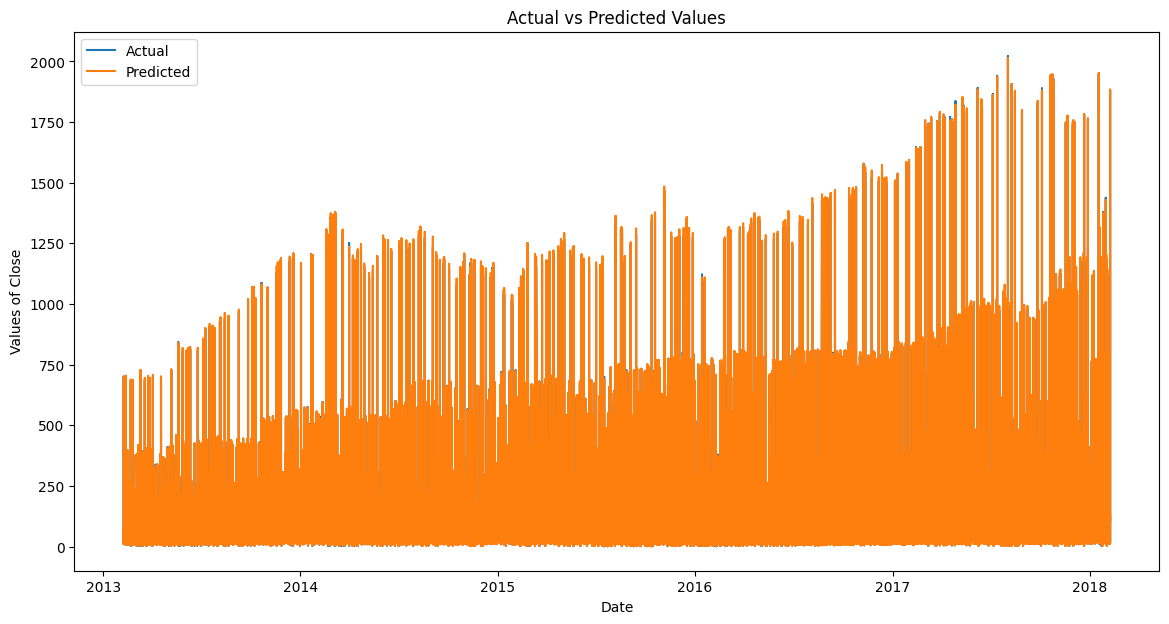

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Assuming dates is a pandas Series or array containing the dates for the test set
dates = X_test.index  # or any other way you have to get the dates for the test set

# Combine dates, y_test, and y_pred into a DataFrame for easy sorting
df = pd.DataFrame({'Date': dates, 'Actual': y_test, 'Predicted': y_pred.flatten()})

# Sort the DataFrame by date
df_sorted = df.sort_values(by='Date')

# Calculate R-squared value
r2 = r2_score(df_sorted['Actual'], df_sorted['Predicted'])
print(f'R-squared value on test set: {r2}')

# Plot actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(df_sorted['Date'], df_sorted['Actual'], label='Actual')
plt.plot(df_sorted['Date'], df_sorted['Predicted'], label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Values of Close')
plt.legend()
plt.show()


**3) APPLYING BIDIRECTIONAL LSTM MODEL**

In [33]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Conv1D, MaxPooling1D, Dense, Input, Bidirectional
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Normalize the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape input to be 3D [samples, timesteps, features] for LSTM
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Define the CNN + Bidirectional LSTM model
inputs = Input(shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]))

# CNN layers
cnn_out = Conv1D(filters=64, kernel_size=1, activation='relu')(inputs)
cnn_out = MaxPooling1D(pool_size=1)(cnn_out)

# Bidirectional LSTM layer
lstm_out = Bidirectional(LSTM(50, activation='relu', return_sequences=False))(cnn_out)

# Output layer
output = Dense(1)(lstm_out)

model = Model(inputs=inputs, outputs=output)
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=5, batch_size=64, validation_data=(X_test_reshaped, y_test), verbose=2, shuffle=False)

Epoch 1/5
7737/7737 - 51s - loss: 623.3787 - val_loss: 1.6088 - 51s/epoch - 7ms/step
Epoch 2/5
7737/7737 - 36s - loss: 2.4793 - val_loss: 1.4018 - 36s/epoch - 5ms/step
Epoch 3/5
7737/7737 - 35s - loss: 2.2514 - val_loss: 1.4857 - 35s/epoch - 5ms/step
Epoch 4/5
7737/7737 - 34s - loss: 2.0717 - val_loss: 1.5218 - 34s/epoch - 4ms/step
Epoch 5/5
7737/7737 - 33s - loss: 1.9177 - val_loss: 1.4547 - 33s/epoch - 4ms/step


EVALUATION METRICES

In [34]:

# Evaluate the model
mse = model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f'Mean Squared Error on test set: {mse}')

# Make predictions
y_pred = model.predict(X_test_reshaped)

# Calculate R-squared value
r2 = r2_score(y_test, y_pred)
print(f'R-squared value on test set: {r2}')

Mean Squared Error on test set: 1.454730749130249
3869/3869 [==============================] - 9s 2ms/step
R-squared value on test set: 0.9998455871895797


EVALUATION GRAPHS

R-squared value on test set: 0.9998455871895797


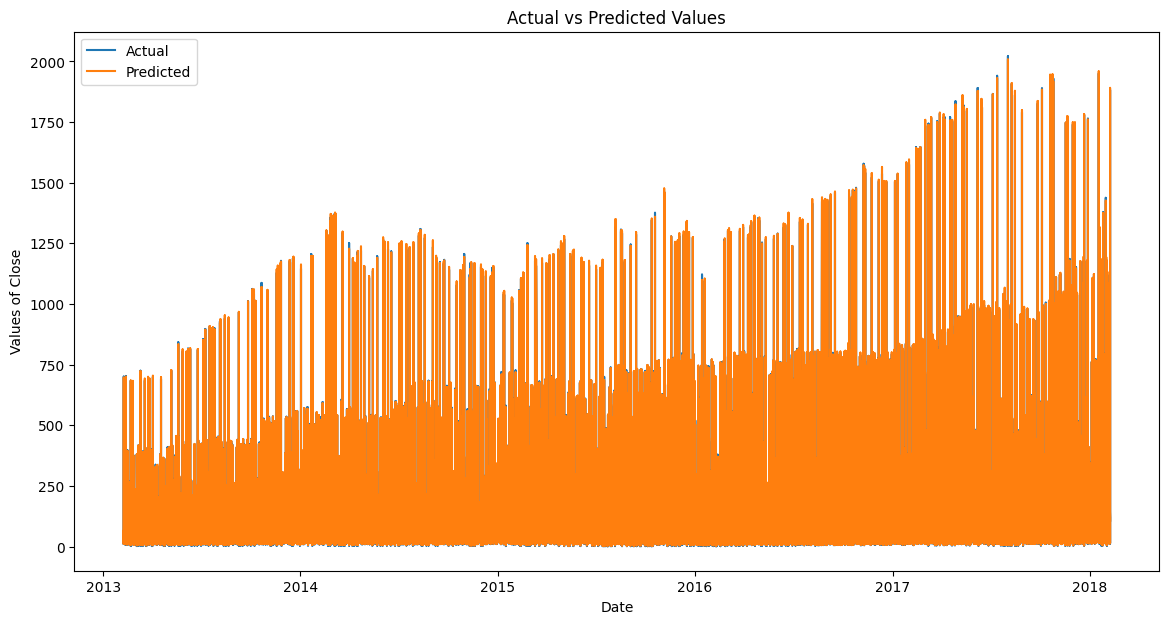

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Assuming dates is a pandas Series or array containing the dates for the test set
dates = X_test.index  # or any other way you have to get the dates for the test set

# Combine dates, y_test, and y_pred into a DataFrame for easy sorting
df = pd.DataFrame({'Date': dates, 'Actual': y_test, 'Predicted': y_pred.flatten()})

# Sort the DataFrame by date
df_sorted = df.sort_values(by='Date')

# Calculate R-squared value
r2 = r2_score(df_sorted['Actual'], df_sorted['Predicted'])
print(f'R-squared value on test set: {r2}')

# Plot actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(df_sorted['Date'], df_sorted['Actual'], label='Actual')
plt.plot(df_sorted['Date'], df_sorted['Predicted'], label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Values of Close')
plt.legend()
plt.show()
